In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv('../../data/county_level/full_df.csv')
df.head()

,Unnamed: 0,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,...,Residential segregation - black/white CI high,Residential segregation - non-white/white raw value,Residential segregation - non-white/white numerator,Residential segregation - non-white/white denominator,Residential segregation - non-white/white CI low,Residential segregation - non-white/white CI high,County Code,Year,Deaths,Population
0,0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1001,2010,12,54571
1,1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1003,2010,31,182265
2,2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1009,2010,11,57322
3,3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1015,2010,13,118572
4,4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1031,2010,14,49948


In [19]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Unemployment raw value', 'Income inequality raw value']
dependent_fields = ['Poor mental health days raw value', 'Deaths']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

,State Abbreviation,Name,Release Year,Unemployment raw value,Income inequality raw value,Poor mental health days raw value,Deaths
0,AL,Autauga County,2010,0.046,40.7,4.14,12
1,AL,Baldwin County,2010,0.041,44.5,4.06,31
2,AL,Blount County,2010,0.041,41.1,4.47,11
3,AL,Calhoun County,2010,0.051,45.5,4.84,13
4,AL,Coffee County,2010,0.043,44.7,4.26,14
5,AL,Colbert County,2010,0.058,43.5,4.70,10
6,AL,Cullman County,2010,0.043,45.6,5.29,10
7,AL,Dale County,2010,0.048,41.4,3.73,10
8,AL,DeKalb County,2010,0.052,45.8,4.90,12
9,AL,Elmore County,2010,0.046,40.3,3.15,12


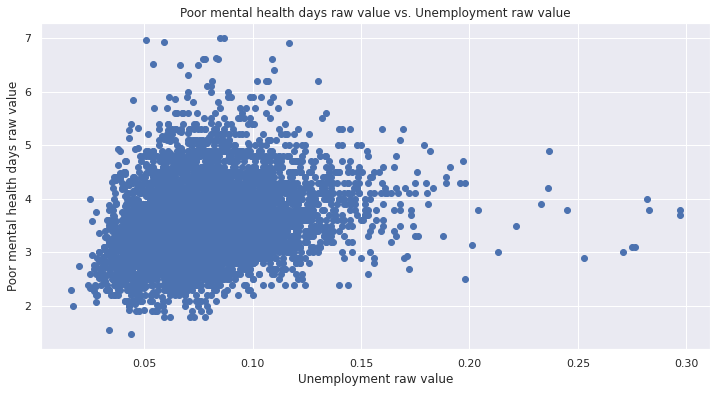

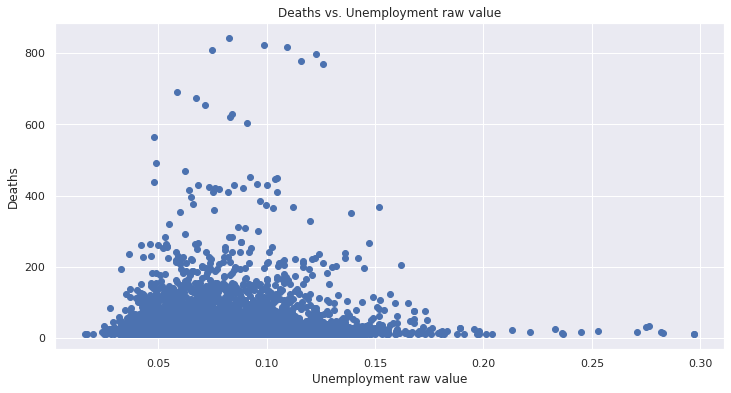

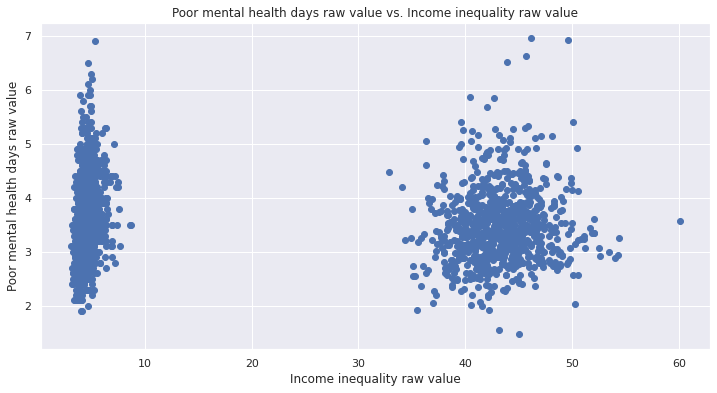

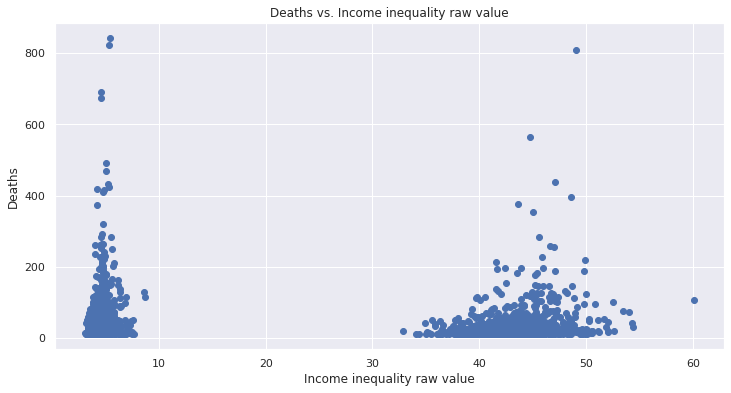

In [20]:
sns.set_theme()
for i, i_field in enumerate(independent_fields):
    for j, d_field in enumerate(dependent_fields):
        plt.figure(i * len(dependent_fields) + j, figsize=(12, 6))
        field_df = filtered_df[[i_field, d_field]].dropna()
        x = field_df[i_field].astype(float).to_numpy()
        y = field_df[d_field].astype(float).to_numpy()
        plt.scatter(x, y)
        plt.title('{} vs. {}'.format(d_field, i_field))
        plt.ylabel(d_field)
        plt.xlabel(i_field)
        plt.show()

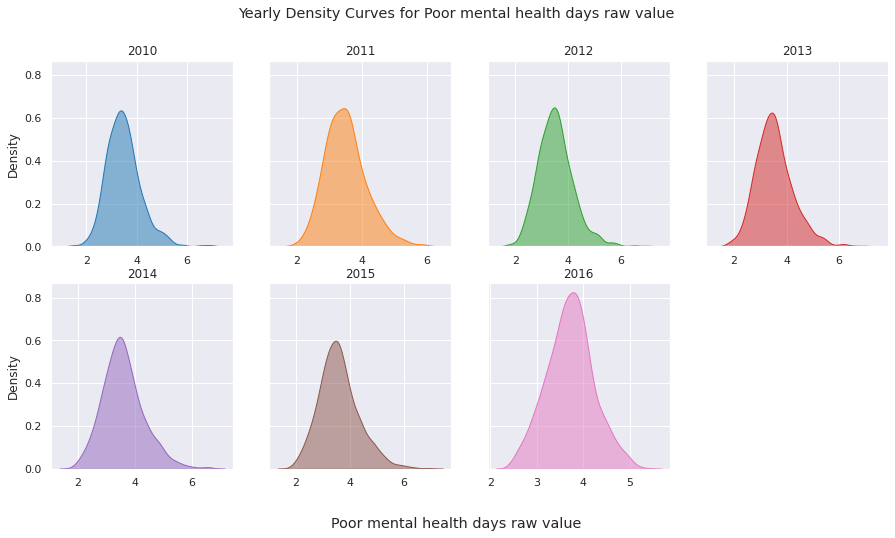

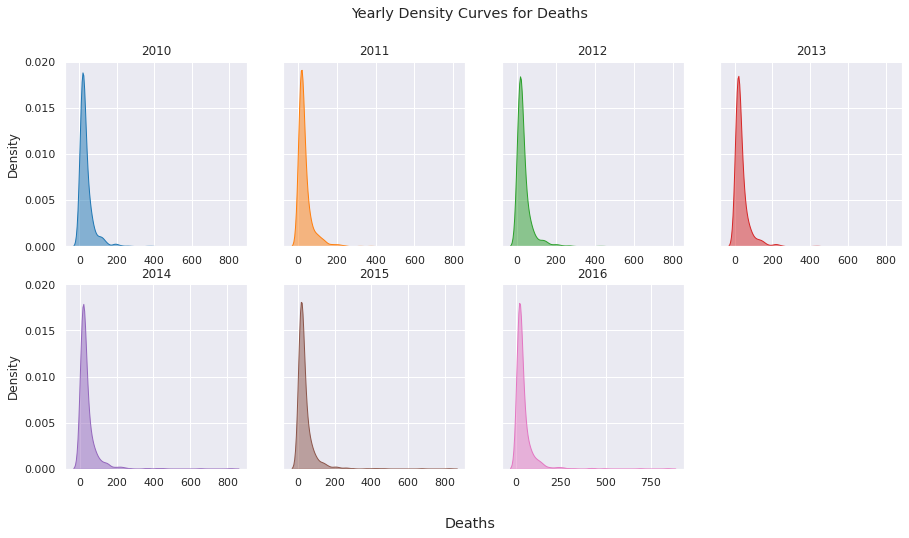

In [21]:
years = sorted(filtered_df['Release Year'].unique()) # get unique year
colors = plt.get_cmap('tab10') # Tableau 10 color scheme
for i, field in enumerate(dependent_fields): # create density plots for all dependent fields
    fig, axes = plt.subplots(2, (len(years) + 1) // 2, figsize=(15, 7.5), sharey=True) # create subplot grid
    field_df = filtered_df[['Release Year', field]].dropna().astype(float)
    for j, ax in enumerate(axes.flatten()):
        if j >= len(years):
            fig.delaxes(ax) # remove all extra axes
        else:
            values = field_df[field_df['Release Year'] == years[j]][field].to_numpy() # get values of dependent variable for current year
            sns.kdeplot(values, shade=True, label=years[j], alpha=0.5, ax=ax, color=colors(j), common_norm=False) # density plot using values and color scheme
            ax.set_title(years[j])
    fig.suptitle('Yearly Density Curves for {}'.format(field))
    fig.supxlabel(field)
    plt.show()